In [1]:
import pandas as pd
from collections import Counter
import plotly.express as px

### Populatopn Density

In [71]:
df = pd.read_csv('density-analyse.csv')
df.head()

,DATAFLOW,LAST UPDATE,freq,terrtypo,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:URT_D3DENS(1.0),19/09/2023 23:00,A,BRD_R,AL,2021,68.0,e
1,ESTAT:URT_D3DENS(1.0),19/09/2023 23:00,A,BRD_R,AL,2022,66.0,e
2,ESTAT:URT_D3DENS(1.0),19/09/2023 23:00,A,BRD_R,AT,2018,121.0,NaN
3,ESTAT:URT_D3DENS(1.0),19/09/2023 23:00,A,BRD_R,AT,2019,122.0,NaN
4,ESTAT:URT_D3DENS(1.0),19/09/2023 23:00,A,BRD_R,AT,2020,122.0,NaN


Abbreviation	Territorial typology
* URB	- Predominantly urban regions
* INT	- Intermediate regions
* INT_CTC	- Intermediate regions - close to city
* INT_RMT	- Intermediate regions - remote
* RUR	- Predominantly rural regions
* RUR_CTC	- Predominantly rural regions - close to city
* RUR_RMT	- Predominantly rural regions - remote
* CST_R	- Coastal regions
* NCST_R	- Non-coastal regions
* MNT_R	- Mountain regions
* NMNT_R	- Non-mountain regions
* ISL_R	- Island regions
* NISL_R	- Non-island regions
* BRD_R	- Border regions
* NBRD_R	- Non-border regions


In [110]:
# Filter data frame by year leaving only data from 2022 
df22 = df[df['TIME_PERIOD'] == 2022]

In [97]:
countries = [] # create an empy list

for value in df['terrtypo'].unique(): # for every unique value from column terrtypo
    dfval = df22[df22['terrtypo'] == value] #filter fata frame by current value from column terrtypo
    #sort data frame by column OBS_VALUE and reset indexes in resulting data frame
    sorted_df = dfval.sort_values(by='OBS_VALUE').reset_index(drop=True) 
    #take index of cell with 'IE' value
    index_with_ie = sorted_df[sorted_df['geo'] == 'IE'].index

    # Get prev and next coutries around IE
    if not index_with_ie.empty:
        index_ie = index_with_ie[0] 

        # Retrieve values from rows with index + 1 and index - 1 in column 'geo' if indices exist
        if index_ie + 1 in sorted_df.index:
            countries.append(sorted_df.at[index_ie + 1, 'geo'])
        if index_ie - 1 in sorted_df.index:
            countries.append(sorted_df.at[index_ie - 1, 'geo'])


In [111]:
countries = list(set(countries))

### Transport Accessibility

In [77]:
dfa = pd.read_csv('accessibility.csv')
dfa.head()

,DATAFLOW,LAST UPDATE,freq,unit,lev_diff,deg_urb,quantile,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ILC_HCMP06(1.0),27/06/2023 23:00,A,PC,HIGH,DEG1,QU1,AT,2012,5.3,NaN
1,ESTAT:ILC_HCMP06(1.0),27/06/2023 23:00,A,PC,HIGH,DEG1,QU1,BE,2012,3.5,NaN
2,ESTAT:ILC_HCMP06(1.0),27/06/2023 23:00,A,PC,HIGH,DEG1,QU1,BG,2012,23.9,NaN
3,ESTAT:ILC_HCMP06(1.0),27/06/2023 23:00,A,PC,HIGH,DEG1,QU1,CH,2012,3.8,NaN
4,ESTAT:ILC_HCMP06(1.0),27/06/2023 23:00,A,PC,HIGH,DEG1,QU1,CY,2012,10.9,NaN


* Very high
* High
* Low
* Very low

In [78]:
# Filter data frame by year leaving only data from 2012
df12 = dfa[(dfa['TIME_PERIOD'] == 2012)&(dfa['deg_urb'] == 'TOTAL')&(dfa['quantile'] == 'TOTAL')]
df12.describe()

,TIME_PERIOD,OBS_VALUE
count,152.0,152.000000
mean,2012.0,25.002632
std,0.0,17.729827
min,2012.0,2.200000
25%,2012.0,9.250000
50%,2012.0,19.400000
75%,2012.0,41.575000
max,2012.0,66.900000


In [99]:
countries1 = []
for value in dfa['lev_diff'].unique(): # for every unique value from column terrtypo
    dfval = df12[df12['lev_diff'] == value] #filter fata frame by current value from column terrtypo
    #sort data frame by column OBS_VALUE and reset indexes in resulting data frame
    sorted_df = dfval.sort_values(by='OBS_VALUE').reset_index(drop=True) 
    #take index of cell with 'IE' value
    index_with_ie = sorted_df[sorted_df['geo'] == 'IE'].index

    # Get prev and next coutries around IE
    if not index_with_ie.empty:
        index_ie = index_with_ie[0] 

        # Retrieve values from rows with index + 1 and index - 1 in column 'geo' if indices exist
        if index_ie + 1 in sorted_df.index:
            countries1.append(sorted_df.at[index_ie + 1, 'geo'])
        if index_ie - 1 in sorted_df.index:
            countries1.append(sorted_df.at[index_ie - 1, 'geo'])

In [100]:
countries1 = list(set(countries1))
countries1

['BE', 'EL', 'DK', 'EA', 'DE', 'NO', 'FI']

### Road Safety

In [101]:
dfs = pd.read_csv('safety_road.csv')
dfs.head()

,DATAFLOW,LAST UPDATE,freq,unit,sex,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TRAN_SF_ROADSE(1.0),20/06/2023 11:00,A,NR,F,AT,1999,320,NaN
1,ESTAT:TRAN_SF_ROADSE(1.0),20/06/2023 11:00,A,NR,F,AT,2000,246,NaN
2,ESTAT:TRAN_SF_ROADSE(1.0),20/06/2023 11:00,A,NR,F,AT,2001,251,NaN
3,ESTAT:TRAN_SF_ROADSE(1.0),20/06/2023 11:00,A,NR,F,AT,2002,276,NaN
4,ESTAT:TRAN_SF_ROADSE(1.0),20/06/2023 11:00,A,NR,F,AT,2003,251,NaN


* NR - Number
* P_MHAB - Per million inhabitants
* Sex - T (Total),
        F (Female),
        M (Male)

In [106]:
# Filter data frame by year leaving only data from 2022 
df21 = dfs[(dfs['TIME_PERIOD'] == 2021)&(dfs['sex'] == 'T')]
df21.describe()

,TIME_PERIOD,OBS_VALUE
count,62.0,62.000000
mean,2021.0,669.500000
std,0.0,2578.550525
min,2021.0,9.000000
25%,2021.0,41.000000
50%,2021.0,58.500000
75%,2021.0,280.750000
max,2021.0,19917.000000


In [107]:
countries2 = [] 

for value in dfs['unit'].unique(): # for every unique value from column terrtypo
    dfval = df21[df21['unit'] == value] #filter fata frame by current value from column terrtypo
    #sort data frame by column OBS_VALUE and reset indexes in resulting data frame
    sorted_df = dfval.sort_values(by='OBS_VALUE').reset_index(drop=True) 
    #take index of cell with 'IE' value
    index_with_ie = sorted_df[sorted_df['geo'] == 'IE'].index

    # Get prev and next coutries around IE
    if not index_with_ie.empty:
        index_ie = index_with_ie[0] 

        # Retrieve values from rows with index + 1 and index - 1 in column 'geo' if indices exist
        if index_ie + 1 in sorted_df.index:
            countries2.append(sorted_df.at[index_ie + 1, 'geo'])
        if index_ie - 1 in sorted_df.index:
            countries2.append(sorted_df.at[index_ie - 1, 'geo'])

In [108]:
countries2

['LV', 'DK', 'NL', 'IS']

In [109]:
selected_countries = []
selected_countries.extend(countries2)
selected_countries.extend(countries1)
selected_countries.extend(countries)
frequency_counter = Counter(selected_countries)
top_4 = frequency_counter.most_common(4)
top_4

[('DK', 2), ('IS', 2), ('EL', 2), ('NO', 2)]

In [116]:
df22 = df.groupby('geo')['OBS_VALUE'].sum().reset_index()
df22 = df22[(df22['geo'] == 'DK')|(df22['geo'] == 'IS')|(df22['geo'] == 'EL')|(df22['geo'] == 'NO')|(df22['geo'] == 'IE')]
df22

,geo,OBS_VALUE
8,DK,18812.0
10,EL,7916.0
17,IE,10780.0
18,IS,1206.0
28,NO,4695.0


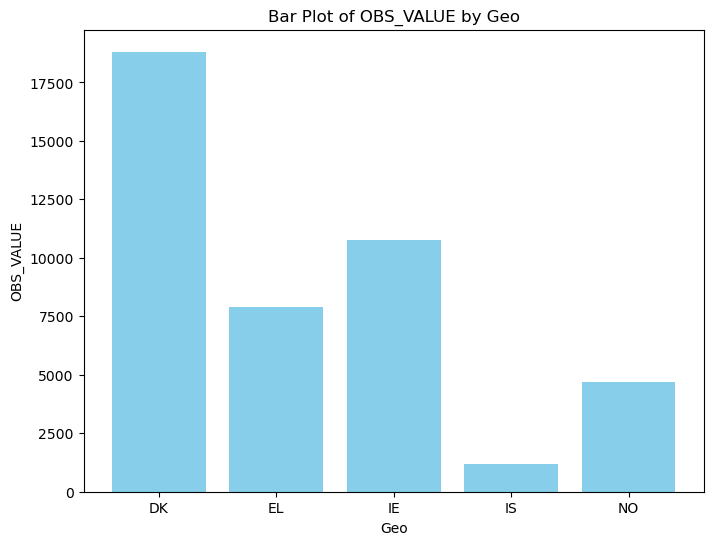

In [119]:
import matplotlib.pyplot as plt
# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(df22['geo'], df22['OBS_VALUE'], color='skyblue')

# Adding labels and title
plt.xlabel('Geo')
plt.ylabel('OBS_VALUE')
plt.title('Bar Plot of OBS_VALUE by Geo')

# Show the plot
plt.show()

In [122]:
df12 = dfa.groupby('geo')['OBS_VALUE'].sum().reset_index()
df12 = df12[(df12['geo'] == 'DK')|(df12['geo'] == 'IS')|(df12['geo'] == 'EL')|(df12['geo'] == 'NO')|(df12['geo'] == 'IE')]
df12

,geo,OBS_VALUE
7,DK,2399.7
13,EL,2399.9
23,IE,2399.5
24,IS,1799.6
31,NO,2400.0


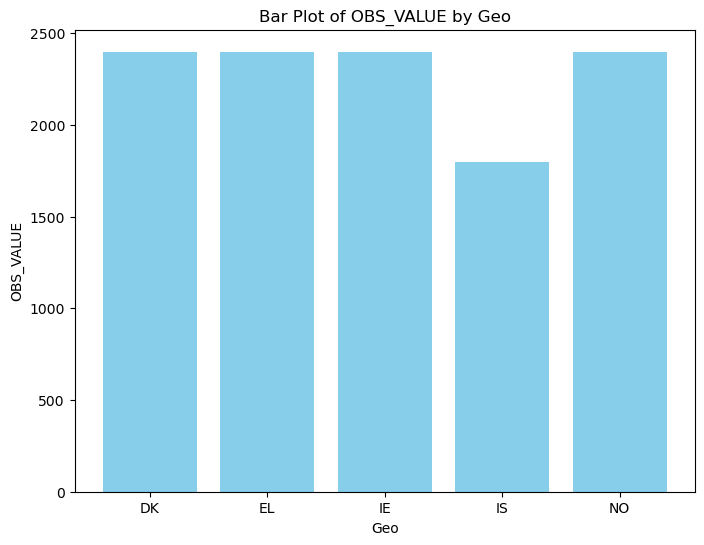

In [123]:
import matplotlib.pyplot as plt
# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(df12['geo'], df12['OBS_VALUE'], color='skyblue')

# Adding labels and title
plt.xlabel('Geo')
plt.ylabel('OBS_VALUE')
plt.title('Bar Plot of OBS_VALUE by Geo')

# Show the plot
plt.show()

In [124]:
df21 = dfs.groupby('geo')['OBS_VALUE'].sum().reset_index()
df21 = df21[(df21['geo'] == 'DK')|(df21['geo'] == 'IS')|(df21['geo'] == 'EL')|(df21['geo'] == 'NO')|(df21['geo'] == 'IE')]
df21

,geo,OBS_VALUE
7,DK,17076
9,EL,65748
16,IE,15909
17,IS,3986
25,NO,11644


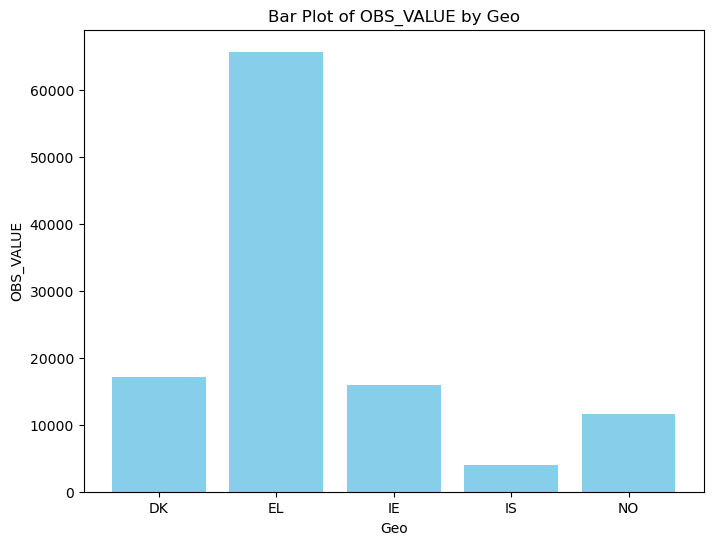

In [125]:
import matplotlib.pyplot as plt
# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(df21['geo'], df21['OBS_VALUE'], color='skyblue')

# Adding labels and title
plt.xlabel('Geo')
plt.ylabel('OBS_VALUE')
plt.title('Bar Plot of OBS_VALUE by Geo')

# Show the plot
plt.show()